# Products by departments

In [1]:
import os
import goes2go as g2g

ImagesPath = "./GOESimages/"
# ABI Products
product_list = {
# "ABI-L2-ACMF": "Clear Sky Mask",
# "ABI-L2-ACHAF": "Cloud Top Height",
"ABI-L2-ACHTF": "Cloud Top Temperature",
# "ABI-L2-LSTF": "Land Surface Temperature",
}
# display(product_list)
from myfunctions.GOESfunctions import definingColormaps
colormaps = definingColormaps()
import geopandas as gpd
gdf_peru_land = gpd.read_file("./Boundaries/PER_adm/PER_adm1.shp")
department_names = sorted(gdf_peru_land['NAME_1'].tolist())
from datetime import datetime
import rioxarray as rxr
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

for selected_product in list(product_list):
    os.makedirs(os.path.join(ImagesPath,"Departments",selected_product), exist_ok=True)
    G = g2g.GOES(satellite=16, product=selected_product)
    # Download and read the data as an xarray Dataset for a specified time range
    dsl = G.timerange(start='2021-02-01 00:00', end='2021-02-01 01:00', save_dir=ImagesPath, return_as = "filelist")
    product_cmap = colormaps[selected_product]
    for department in department_names[:1]:
        outputs_directory = os.path.join(ImagesPath,"Departments",selected_product, department)
        os.makedirs(outputs_directory, exist_ok=True)
        polygon = gdf_peru_land[gdf_peru_land['NAME_1']==department]['geometry']
        for selected_file in dsl['file'][:1]:
            FullFilePath = os.path.join(ImagesPath,selected_file)
            rds = xr.open_dataset(FullFilePath, engine='rasterio')
            rds_re = rds.rio.reproject("EPSG:4326")
            input_datetime = datetime.strptime(rds_re.attrs['date_created'], '%Y-%m-%dT%H:%M:%S.%fZ')
            output_date_string = input_datetime.strftime('%Y-%m-%d %H:%M:%S %Z')
            day, month, year = output_date_string[8:10], output_date_string[5:7], output_date_string[:4]
            hour, minute, seconds = output_date_string[11:13], output_date_string[14:16], output_date_string[17:20]
            varname = list(rds_re.data_vars.keys())[0]
            ImageName = '_'.join([varname,year,month,day,hour,minute]) + '.png'
            data = rds_re[varname].isel(band=0)
            data_clip = data.rio.clip(polygon)
            fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
            im = ax.pcolormesh(data_clip.x,data_clip.y,data_clip.values,cmap=product_cmap)
            plt.colorbar(im, label = data.attrs['long_name']+' ['+data.attrs['units']+']')
            ax.set(title = 'Department: '+ department,
                   xlabel = "Longitude",
                   ylabel = "Latitude")
            ax.add_geometries(polygon, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black')
            ax.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.7,ls='--')
            FullImagePath = os.path.join(outputs_directory,ImageName)
            # plt.savefig(FullImagePath,dpi=300,bbox_inches='tight')
            plt.show()

{'ABI-L2-DSRF': 'turbo',
 'ABI-L2-ACMF': 'Blues',
 'ABI-L2-TPWF': 'terrain',
 'ABI-L2-LSTF': 'jet',
 'ABI-L2-RRQPEF': <matplotlib.colors.ListedColormap at 0x12265f78a90>,
 'ABI-L2-ACHAF': 'ocean',
 'ABI-L2-ACHTF': 'jet'}

 👮🏻‍♂️ File already exists. Do not overwrite: GOESimages\noaa-goes16\ABI-L2-ACHTF\2021\032\00\OR_ABI-L2-ACHTF-M6_G16_s20210320000152_e20210320009460_c20210320011187.nc
 👮🏻‍♂️ File already exists. Do not overwrite: GOESimages\noaa-goes16\ABI-L2-ACHTF\2021\032\00\OR_ABI-L2-ACHTF-M6_G16_s20210320010152_e20210320019460_c20210320021153.nc
 👮🏻‍♂️ File already exists. Do not overwrite: GOESimages\noaa-goes16\ABI-L2-ACHTF\2021\032\00\OR_ABI-L2-ACHTF-M6_G16_s20210320020152_e20210320029460_c20210320031067.nc
 👮🏻‍♂️ File already exists. Do not overwrite: GOESimages\noaa-goes16\ABI-L2-ACHTF\2021\032\00\OR_ABI-L2-ACHTF-M6_G16_s20210320030152_e20210320039460_c20210320041077.nc
 👮🏻‍♂️ File already exists. Do not overwrite: GOESimages\noaa-goes16\ABI-L2-ACHTF\2021\032\00\OR_ABI-L2-ACHTF-M6_G16_s20210320040152_e20210320049460_c20210320051194.nc
 👮🏻‍♂️ File already exists. Do not overwrite: GOESimages\noaa-goes16\ABI-L2-ACHTF\2021\032\00\OR_ABI-L2-ACHTF-M6_G16_s20210320050152_e20210320059460_c2021032010

RasterioIOError: './GOESimages/noaa-goes16/ABI-L2-ACHTF/2021/032/00/OR_ABI-L2-ACHTF-M6_G16_s20210320000152_e20210320009460_c20210320011187.nc' not recognized as a supported file format.

In [5]:
rds = xr.open_dataset(FullFilePath, engine='netcdf4')

OSError: [Errno -101] NetCDF: HDF error: 's:\\Work\\CTIC\\GOESimages\\noaa-goes16\\ABI-L2-ACHTF\\2021\\032\\00\\OR_ABI-L2-ACHTF-M6_G16_s20210320000152_e20210320009460_c20210320011187.nc'

{'ABI-L2-DSRF': 'turbo',
 'ABI-L2-ACMF': 'rainbow',
 'ABI-L2-TPWF': 'terrain',
 'ABI-L2-LSTF': 'jet',
 'ABI-L2-RRQPEF': <matplotlib.colors.ListedColormap at 0x1fa1ed71a90>}

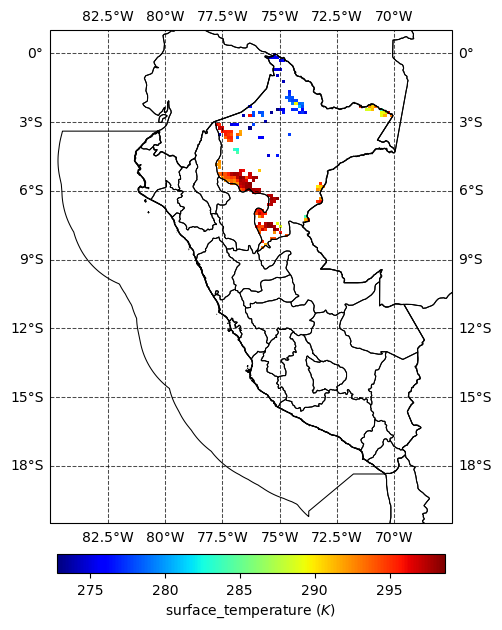

In [50]:
#==================== Defining projections ====================
import cartopy.crs as ccrs
map_proj_pc = ccrs.PlateCarree(), "PlateCarree projection"

from myfunctions.GOESfunctions import *
colormaps = definingColormaps()
product_cmap = colormaps[selected_product]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=map_proj_pc[0]))
im = ax.pcolormesh(lon,lat,data_clip,cmap=product_cmap)
cbar = plt.colorbar(im,ax=ax, orientation='horizontal', shrink=0.5, pad=0.05)
units_latex = re.sub(r'(\w)(-)(\d)', r'\1^{-\3}', data_clip.attrs['units'])
cbar.set_label(r"{} $({})$".format(data_clip.attrs['standard_name'],units_latex))
ax.set_extent(PeruLimits_deg)
ax.add_feature(coastlines_feature, linewidth=0.75)
ax.add_feature(countries_feature, linewidth=0.75)
ax.add_geometries(gdf_peru_land['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
ax.add_geometries(gdf_peru_sea['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
ax.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.7,ls='--')
# ax.set_title("GOES Image, Platform: {}, Geographic coverage: {}\n {}".format(data.platform_ID,data.scene_id,str_ImgTime))
plt.show()

In [80]:
rds_re.attrs['date_created']

'2021-02-01T00:10:25.5Z'

# Products in real time


======================================== goes-py =========================================
 A Python package can be useful to download dataset from goes satellite on AWS  0.2.1v
Current time is: 2023-07-13 04:13:05 UTC
OR_ABI-L2-ACMF-M6_G16_s20231940400207_e20231940409515_c20231940410347.nc: [##########] 100%  25.119892 MB/25.119892 MBDownloading the product ABI-L2-TPWF
OR_ABI-L2-TPWF-M6_G16_s20231940400207_e20231940409515_c20231940410589.nc: [##########] 100%  1.109838 MB/1.109838 MBDownloading the product ABI-L2-RRQPEF
OR_ABI-L2-RRQPEF-M6_G16_s20231940400207_e20231940409515_c20231940410013.nc: [##########] 100%  1.813149 MB/1.813149 MBDownloading the product ABI-L2-LSTF
OR_ABI-L2-LSTF-M6_G16_s20231940400207_e20231940409515_c20231940410399.nc: [##########] 100%  0.698022 MB/0.698022 MBProcessing files in path: .\GOESimages\goes16\2023\07\13\ABI-L2-DSRF\04
Directory does not exist. Creating new one...

No old files detected.
Processing files in path: .\GOESimages\goes16\2023\07\13\ABI

{'OR_ABI-L2-ACMF-M6_G16_s20231940400207_e20231940409515_c20231940410347.nc'}

Working with file: OR_ABI-L2-ACMF-M6_G16_s20231940400207_e20231940409515_c20231940410347.nc
File image not found, creating one...


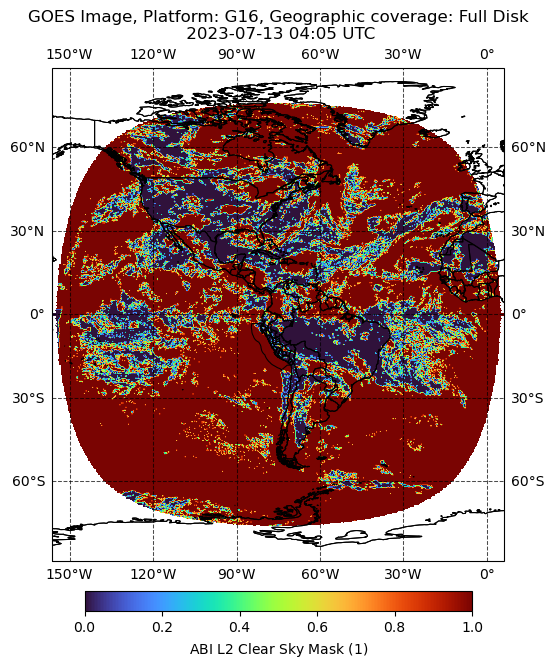

Image 'goes16_2023_07_13_ACMF_04_00.png' saved in '.\GOESimages\goes16\2023\07\13\ABI-L2-ACMF\04'
All the files have been processed.
Processing files in path: .\GOESimages\goes16\2023\07\13\ABI-L2-TPWF\04
GOES datasets available:


{'OR_ABI-L2-TPWF-M6_G16_s20231940400207_e20231940409515_c20231940410589.nc'}

Working with file: OR_ABI-L2-TPWF-M6_G16_s20231940400207_e20231940409515_c20231940410589.nc
File image not found, creating one...


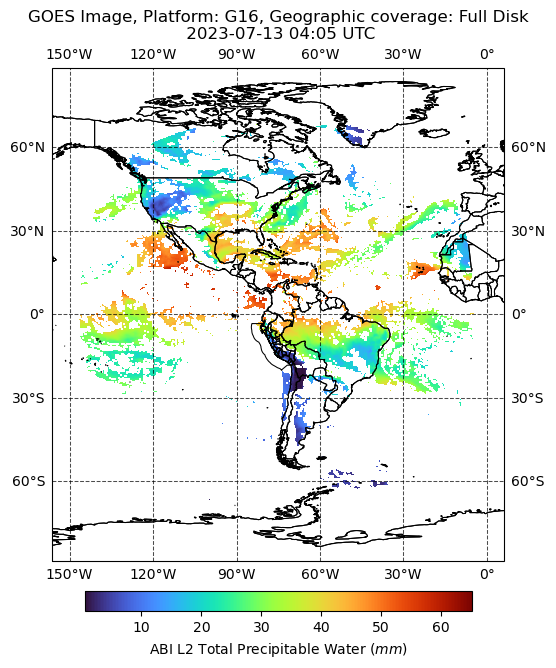

Image 'goes16_2023_07_13_TPWF_04_00.png' saved in '.\GOESimages\goes16\2023\07\13\ABI-L2-TPWF\04'
All the files have been processed.
Processing files in path: .\GOESimages\goes16\2023\07\13\ABI-L2-RRQPEF\04
GOES datasets available:


{'OR_ABI-L2-RRQPEF-M6_G16_s20231940400207_e20231940409515_c20231940410013.nc'}

Working with file: OR_ABI-L2-RRQPEF-M6_G16_s20231940400207_e20231940409515_c20231940410013.nc
File image not found, creating one...


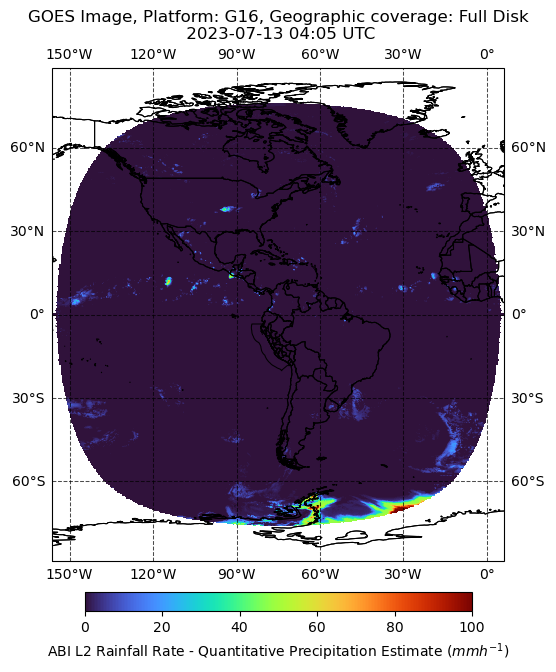

Image 'goes16_2023_07_13_RRQPEF_04_00.png' saved in '.\GOESimages\goes16\2023\07\13\ABI-L2-RRQPEF\04'
All the files have been processed.
Processing files in path: .\GOESimages\goes16\2023\07\13\ABI-L2-LSTF\04
GOES datasets available:


{'OR_ABI-L2-LSTF-M6_G16_s20231940400207_e20231940409515_c20231940410399.nc'}

Working with file: OR_ABI-L2-LSTF-M6_G16_s20231940400207_e20231940409515_c20231940410399.nc
File image not found, creating one...


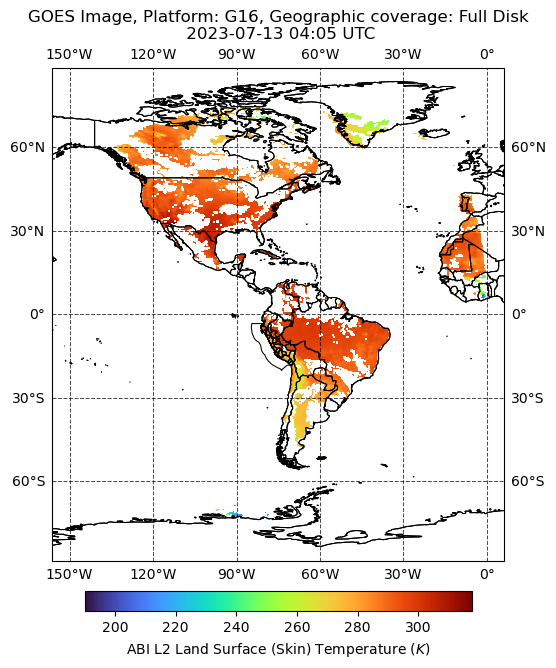

Image 'goes16_2023_07_13_LSTF_04_00.png' saved in '.\GOESimages\goes16\2023\07\13\ABI-L2-LSTF\04'
All the files have been processed.
Waiting 5 minutes for the next file upload


In [1]:
#==================== We set product parameters to download ====================
import os, re

# You can create a list of number strings by using: [f"{i:02}" for i in range(13)]
destination_path = '.\\GOESimages\\'
bucket = 'noaa-goes16'
satellite = bucket[re.search('noaa-',bucket).end():]
product=['ABI-L2-DSRF','ABI-L2-ACMF','ABI-L2-TPWF','ABI-L2-RRQPEF','ABI-L2-LSTF'] # Product to select
channel=['C01','C02','C03'] # Number of band to select from 'C01' to 'C16'
# Select a product and channel to process
selected_product = product[-1]
domain = selected_product[-1]
selected_channel = channel[0]

from goespy.Downloader import ABI_Downloader
import xarray as xr
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta
import pytz, time
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone

import numpy as np
PeruLimits_deg = [-85, -67.5, -20.5, 1.0] # Define the coordinates of the bounding box around Peru

#==================== Creating georeferenced variables ====================
import geopandas as gpd
from shapely.geometry import Polygon
import cartopy.feature as cfeature
# Add coastlines feature
coastlines_feature = cfeature.NaturalEarthFeature(
    category='physical',
    name='coastline',
    scale='50m',
    edgecolor='black',
    facecolor='none')
# Add country boundaries feature
countries_feature = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none')
# Create the polygon representing the bounding box
peru_bbox = Polygon([(PeruLimits_deg[0], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[3]), (PeruLimits_deg[0], PeruLimits_deg[3])])
# gdf_countries = gpd.read_file("./Boundaries/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
gdf_maritime = gpd.read_file("./Boundaries/World_EEZ_v11_20191118/eez_v11.shp",mask=peru_bbox)
gdf_states = gpd.read_file("./Boundaries/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp",mask=peru_bbox)
# Filter the GeoDataFrame to keep only rows where adm1_code matches "PER"
gdf_peru_land = gdf_states[gdf_states["adm1_code"].str[:3] == "PER"]
gdf_peru_sea = gdf_maritime[gdf_maritime["TERRITORY1"] == "Peru"].iloc[[1]]
# gdf_maritime = gdf_maritime[gdf_maritime["TERRITORY1"] != "Peru"]

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# import sys
# sys.path.append('./Local2Drive/')
# import ToGoogleDrive as togd
import IPython.display as display
# Set the time interval for clearing the output
time_interval = timedelta(hours=1)
start_time = datetime.now()

while True:
    TodaysDate = datetime.now(utc).strftime('%Y-%m-%d %H:%M:%S %Z')
    day, month, year = TodaysDate[8:10], TodaysDate[5:7], TodaysDate[:4]
    hour, minute, seconds = TodaysDate[11:13], TodaysDate[14:16], TodaysDate[17:20]
    print("============================================================")
    print("Current time is: {}".format(TodaysDate))
        
    #==================== Building the path to the folder for file storage ====================
    ABI = ABI_Downloader(destination_path,bucket,year,month,day,hour,product,selected_channel)
    for selected_product in product:
        FilePath = os.path.join(destination_path, satellite, year, month, day, selected_product, hour)
        if (selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
            FilePath = os.path.join(FilePath,selected_channel)
        print("\nProcessing files in path: {}".format(FilePath))
        
        if (not os.path.exists(FilePath)):
            print("Directory does not exist. Creating new one...") 
            os.makedirs(FilePath)
        old_files = os.listdir(FilePath)
        old_nc_files = set([file for file in old_files if file.endswith('.nc')])
        are_there_old_filenames = (len(old_nc_files) > 0)
        
        # new_files = os.listdir(FilePath)
        # new_nc_files = set([file for file in new_files if file.endswith('.nc')])
        # new_filenames = list(new_nc_files - old_nc_files)
        # are_there_new_filenames = (len(new_filenames) > 0)
        
        # to_plot_existing_images = (not image_exists) and are_there_old_filenames
        if (are_there_old_filenames):
            print("GOES datasets available:")
            display.display(old_nc_files)
            # if(to_plot_existing_images): 
            #     print("Old files detected, but there are no images saved. Creating them...")
            #     filenames = old_nc_files
            # elif(are_there_new_filenames): 
            #     print("\nNew files detected!:")
            #     filenames = new_filenames
            
            for f in old_nc_files: 
                print("Working with file: {}".format(f))
                # Building image name format
                start_date_str = f.split("_s")[1][:13]
                start_date = datetime.strptime(start_date_str, "%Y%j%H%M%S").strftime('%Y-%m-%d %H:%M:%S')
                img_year, img_month, img_day = start_date[:4], start_date[5:7], start_date[8:10]
                img_hour, img_minute, img_seconds = start_date[11:13], start_date[14:16], start_date[17:20]
                if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
                    ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ selected_channel +'_'+ img_hour +'_'+ img_minute + '.png'
                else: ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ img_hour +'_'+ img_minute + '.png'
                FullImagePath = os.path.join(FilePath, ImageName)
                does_image_exist = os.path.exists(FullImagePath)
                if(not does_image_exist):
                    print("File image not found, creating one...")
                    FullFilePath = os.path.join(FilePath,f)
                    #==================== Read the dataset and its metadata ====================
                    data = xr.open_dataset(FullFilePath, engine='netcdf4')
                    if ('lon' in data.coords) and ('lat' in data.coords): coords = "lonlat"
                    elif ('x' in data.coords) and ('y' in data.coords): coords = "xy"

                    #==================== Getting information from GOES image dataset ====================
                    varname = list(data.data_vars.keys())[0]
                    ImgTime = data.t.values
                    ImgTime = utc.localize(datetime.utcfromtimestamp(ImgTime.tolist()//10**9))
                    minute = str(ImgTime.minute).zfill(2)
                    str_ImgTime = ImgTime.strftime('%Y-%m-%d %H:%M %Z')
                    spatial_res = data.attrs["spatial_resolution"].split()[0]
                    spatial_res = float(re.findall('\d+',spatial_res)[0])
                    LonCenter = data.geospatial_lat_lon_extent.geospatial_lon_center
                    LatCenter = data.geospatial_lat_lon_extent.geospatial_lat_center
                    LonLimits = np.array([data.geospatial_lat_lon_extent.geospatial_westbound_longitude, data.geospatial_lat_lon_extent.geospatial_eastbound_longitude])
                    LatLimits = np.array([data.geospatial_lat_lon_extent.geospatial_southbound_latitude, data.geospatial_lat_lon_extent.geospatial_northbound_latitude])
                    imgExtention = [LonLimits[0], LonLimits[1], LatLimits[0], LatLimits[1]]

                    #==================== Defining projections ====================
                    map_proj_ortho = ccrs.Orthographic(central_longitude=LonCenter, central_latitude=LatCenter), "Orthographic"
                    map_proj_pc = ccrs.PlateCarree(), "PlateCarree projection"
                    if (coords == "lonlat"):
                        lon = data.lon.values
                        lat = data.lat.values
                        gproj = data['goes_lat_lon_projection']
                        map_proj_geos = ccrs.Geostationary(
                                    central_longitude=LonCenter,
                                    satellite_height=data.nominal_satellite_height.values*1000,
                                    sweep_axis='x',
                                    globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                                                semimajor_axis=gproj.semi_major_axis, 
                                                semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
                        map_proj_src = map_proj_pc
                        map_proj_dst = map_proj_geos
                    elif (coords == "xy"):
                        gproj = data['goes_imager_projection']
                        map_proj_geos = ccrs.Geostationary(
                                        central_longitude=LonCenter,
                                        satellite_height=data.nominal_satellite_height.values*1000,
                                        sweep_axis=gproj.sweep_angle_axis,
                                        globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                                                        semimajor_axis=gproj.semi_major_axis, 
                                                        semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
                        map_proj_src = map_proj_geos
                        map_proj_dst = map_proj_pc
                        
                    #==================== Plotting the product ====================
                    if(coords == "xy"):
                        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=map_proj_dst[0]))
                        ax.set_extent(PeruLimits_deg)
                        # im = ax.imshow(transformed_data, origin='lower', transform=map_proj_dst[0], extent=extent_deg, cmap='turbo')
                        im = ax.imshow(data[varname].values, transform=map_proj_src[0], cmap='turbo')
                        cbar = plt.colorbar(im,ax=ax, orientation='horizontal', shrink=0.5, pad=0.05)
                        units_latex = re.sub(r'(\w)(-)(\d)', r'\1^{-\3}', data[varname].units)
                        if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
                            cbar.set_label(r"{} $({})$, band={}".format(data.title,units_latex,selected_channel))
                        else:
                            cbar.set_label(r"{} $({})$".format(data.title,units_latex))
                        ax.add_feature(coastlines_feature, linewidth=0.75)
                        ax.add_feature(countries_feature, linewidth=0.75)
                        ax.add_geometries(gdf_peru_land['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
                        ax.add_geometries(gdf_peru_sea['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
                        ax.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.7,ls='--')
                        ax.set_title("GOES Image, Platform: {}, Geographic coverage: {}\n {}".format(data.platform_ID,data.scene_id,str_ImgTime))
                    elif(coords == "lonlat"):
                        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=map_proj_src[0]))
                        ax.set_extent(PeruLimits_deg)
                        im = ax.pcolormesh(lon,lat,data[varname].values,cmap='turbo',transform=map_proj_src[0])
                        cbar = plt.colorbar(im,ax=ax, orientation='horizontal', shrink=0.5, pad=0.05)
                        units_latex = re.sub(r'(\w)(-)(\d)', r'\1^{-\3}', data[varname].units)
                        if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
                            cbar.set_label(r"{} $({})$, band={}".format(data.title,units_latex,selected_channel))
                        else:
                            cbar.set_label(r"{} $({})$".format(data.title,units_latex))
                        ax.add_feature(coastlines_feature, linewidth=0.75)
                        ax.add_feature(countries_feature, linewidth=0.75)
                        ax.add_geometries(gdf_peru_land['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
                        ax.add_geometries(gdf_peru_sea['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
                        ax.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.7,ls='--')
                        ax.set_title("GOES Image, Platform: {}, Geographic coverage: {}\n {}".format(data.platform_ID,data.scene_id,str_ImgTime))
                    plt.savefig(FullImagePath,dpi=300,bbox_inches='tight')
                    plt.show()
                    print("Image '{}' saved in '{}'".format(ImageName,FilePath))
                #==================== Uploading images to boogle Drive ====================
                # GOESimages_folder_id = "1MuqlbKZDyh_Ztlz9rMFx6hdAFgOdRuoD"
                # togd.subir_archivo(os.path.join(FilePath, ImageName), GOESimages_folder_id)
            print("All the files have been processed.")
        else: 
            print("No old files detected.") 
    # Check if it's time to clear the output
    elapsed_time = datetime.now() - start_time
    if elapsed_time >= time_interval:
        # Clear the output
        display.clear_output(wait=True)
        # Reset the start time
        start_time = datetime.now()
        
    total_remaining_seconds = (10 - (int(minute) % 10)) * 60 - int(seconds)
    remaining_minutes = total_remaining_seconds // 60
    # remaining_seconds = total_remaining_seconds % 60
    print("Waiting {} minutes for the next file upload".format(remaining_minutes + 1))
    time.sleep((remaining_minutes+1)*60)